<div class="alert alert-block alert-success">
    
# Module 17: Comparing Classification Algorithms
    
 👨‍🏫 **Jay Kalantar**      
 📅 **[17-July-2023]**
  

</div>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # for prettier plots
sns.set()

# perform logistic regression on the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.impute import KNNImputer
import warnings

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [4]:
pd.set_option('display.max_columns', None)
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
df.shape

(41188, 21)

In [7]:
# Value counts for each non-numerical column including the target column name
for col in df.columns:
    if df[col].dtype == 'object':
        print('-----', col, '-----')
        print(df[col].value_counts())
        print()

----- job -----
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

----- marital -----
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

----- education -----
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

----- default -----
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

----- housing -----
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

----- loan -----
no         33950
yes         6248
unknown      990
Name: loa

In [33]:
# No null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Looks like data shows 'unknown' instead of NaN

<div class="alert alert-block alert-info">

####  Business Understanding:  To predict whether a client will subscribe to a term deposit based on the data provided.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

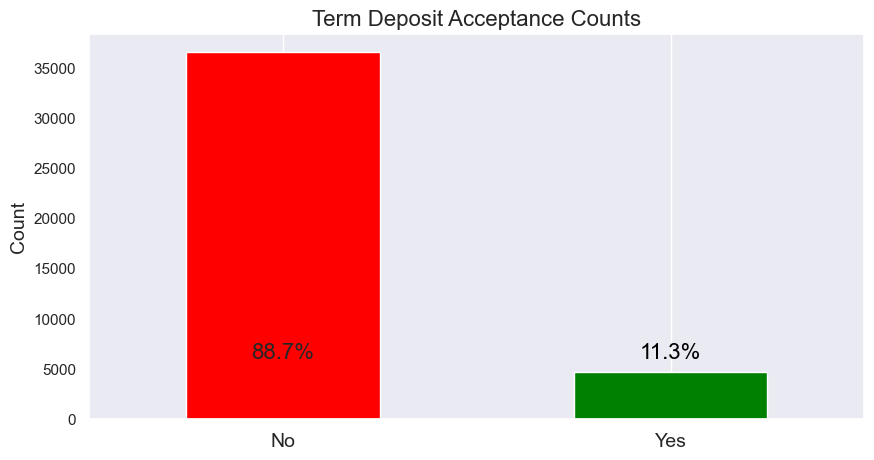

In [4]:
# Plot Approved value counts histogram
df['y'].value_counts().plot(kind='bar', figsize=(10, 5), color=['red', 'green'])
plt.ylabel('Count',fontsize=14)
plt.title('Term Deposit Acceptance Counts', fontsize=16)
plt.xticks([0, 1], ['No','Yes'], rotation=0, fontsize=14)

for i in range(len(df['y'].value_counts())):
    count = df['y'].value_counts()[i]
    pct_string = f'{100*count/len(df):.1f}%'
    # plt.text(i, count+10, pct_string, ha='center', fontsize=16)
    if i == 1:
        plt.text(i, 6000, pct_string, ha='center', fontsize=16, color='black')
    else:
        plt.text(i, 6000, pct_string, ha='center', fontsize=16)
plt.grid(axis='y')
plt.savefig('images\Term_Depsite_Acceptance_Counts.png', bbox_inches='tight');

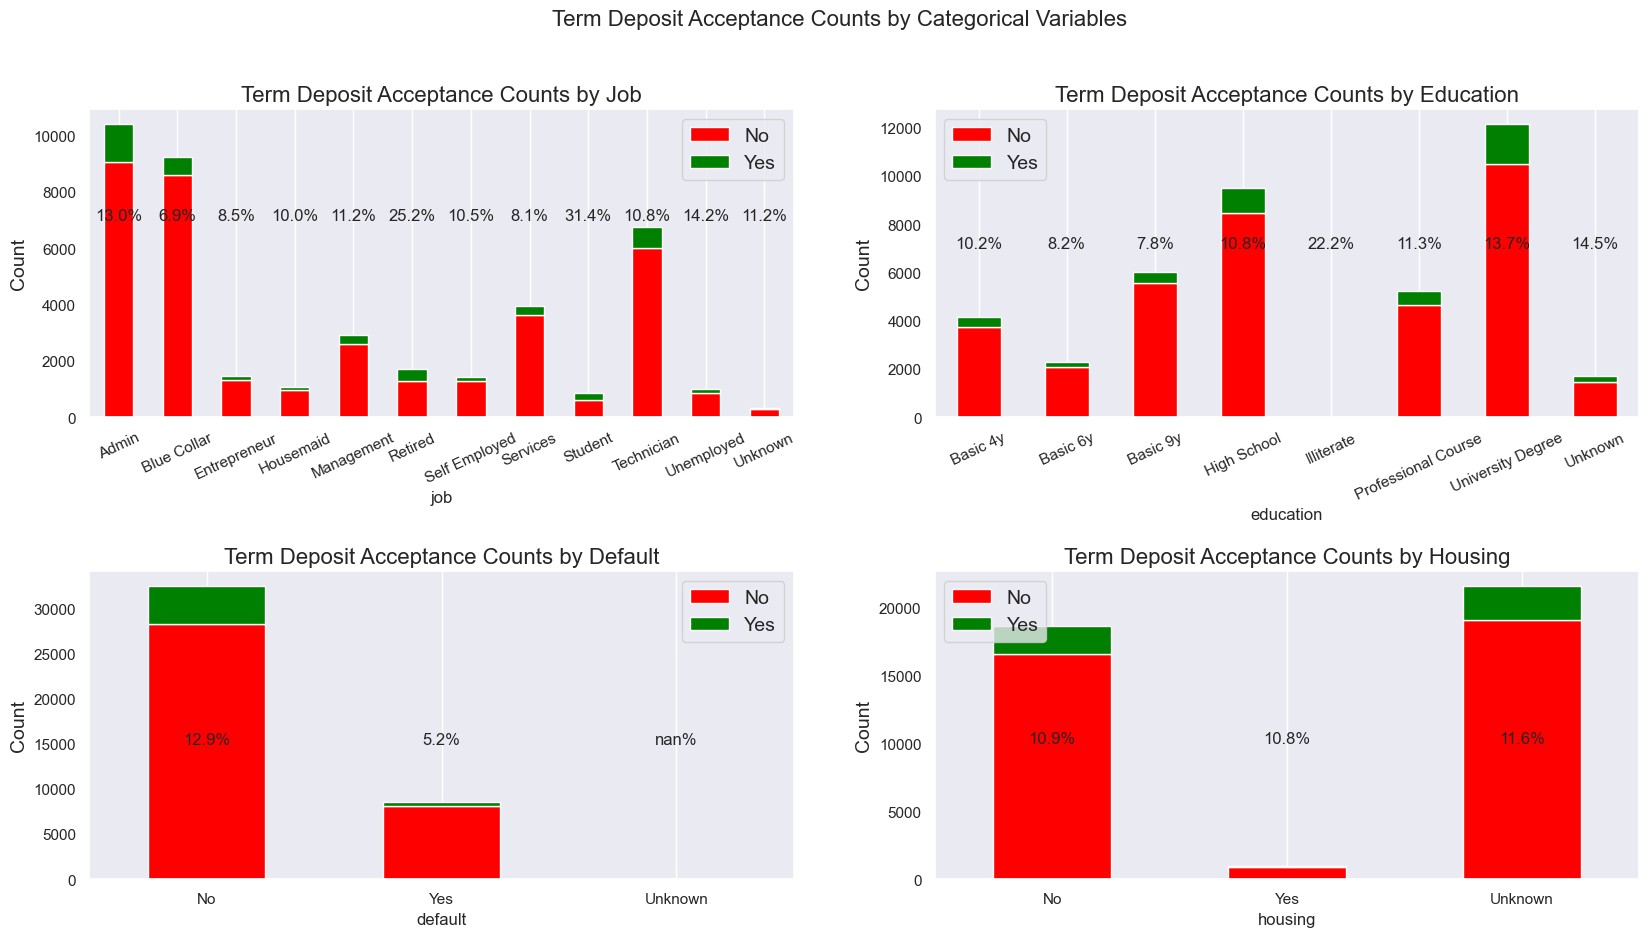

In [10]:
# Plot Categorical Variables
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Term Deposit Acceptance Counts by Categorical Variables', fontsize=16)

# Plot of Term Deposit Acceptance Counts by job
df.groupby(['job', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0, 0], color=['red', 'green'])
axes[0, 0].set_ylabel('Count',fontsize=14)
axes[0, 0].set_title('Term Deposit Acceptance Counts by Job', fontsize=16)
axes[0, 0].set_xticklabels(['Admin', 'Blue Collar', 'Entrepreneur', 'Housemaid', 'Management', 'Retired', 'Self Employed', 'Services', 'Student', 'Technician', 'Unemployed', 'Unknown'])
for tick in axes[0, 0].get_xticklabels():
    tick.set_rotation(25)
axes[0, 0].legend(['No','Yes'], loc='upper right', fontsize=14)
# show % yes over each bar sorted by job
for i in range(len(df['job'].value_counts())):
    count = df.groupby(['job', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["job"]).size()[i]:.1f}%'
    axes[0, 0].text(i, 7000, pct_string, ha='center', fontsize=12)
axes[0, 0].grid(axis='y')

# Plot of Term Deposit Acceptance Counts by education
df.groupby(['education', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0, 1], color=['red', 'green'])
axes[0, 1].set_ylabel('Count',fontsize=14)
axes[0, 1].set_title('Term Deposit Acceptance Counts by Education', fontsize=16)
axes[0, 1].set_xticklabels(['Basic 4y', 'Basic 6y', 'Basic 9y', 'High School', 'Illiterate', 'Professional Course', 'University Degree', 'Unknown'])
for tick in axes[0, 1].get_xticklabels():
    tick.set_rotation(25)
axes[0, 1].legend(['No','Yes'], loc='upper left', fontsize=14)
# show % yes over each bar sorted by education
for i in range(len(df['education'].value_counts())):
    count = df.groupby(['education', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["education"]).size()[i]:.1f}%'
    axes[0, 1].text(i, 7000, pct_string, ha='center', fontsize=12)
axes[0, 1].grid(axis='y')
fig.subplots_adjust(hspace=0.5)

# Plot of Term Deposit Acceptance Counts by default
df.groupby(['default', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1, 0], color=['red', 'green'])
axes[1, 0].set_ylabel('Count',fontsize=14)
axes[1, 0].set_title('Term Deposit Acceptance Counts by Default', fontsize=16)
axes[1, 0].set_xticklabels(['No', 'Yes', 'Unknown'])
for tick in axes[1, 0].get_xticklabels():
    tick.set_rotation(0)
axes[1, 0].legend(['No','Yes'], loc='upper right', fontsize=14)
# show % yes over each bar sorted by default
for i in range(len(df['default'].value_counts())):
    count = df.groupby(['default', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["default"]).size()[i]:.1f}%'
    axes[1, 0].text(i, 15000, pct_string, ha='center', fontsize=12)
axes[1, 0].grid(axis='y')

# Plot of Term Deposit Acceptance Counts by housing
df.groupby(['housing', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1, 1], color=['red', 'green'])
axes[1, 1].set_ylabel('Count',fontsize=14)
axes[1, 1].set_title('Term Deposit Acceptance Counts by Housing', fontsize=16)
axes[1, 1].set_xticklabels(['No', 'Yes', 'Unknown'])
for tick in axes[1, 1].get_xticklabels():
    tick.set_rotation(0)
axes[1, 1].legend(['No','Yes'], loc='upper left', fontsize=14)
# show % yes over each bar sorted by housing
for i in range(len(df['housing'].value_counts())):
    count = df.groupby(['housing', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["housing"]).size()[i]:.1f}%'
    axes[1, 1].text(i, 10000, pct_string, ha='center', fontsize=12)
axes[1, 1].grid(axis='y')
plt.savefig('images\Term_Deposit_Acceptance_Counts_by_Categorical_Variables1.png', bbox_inches='tight');


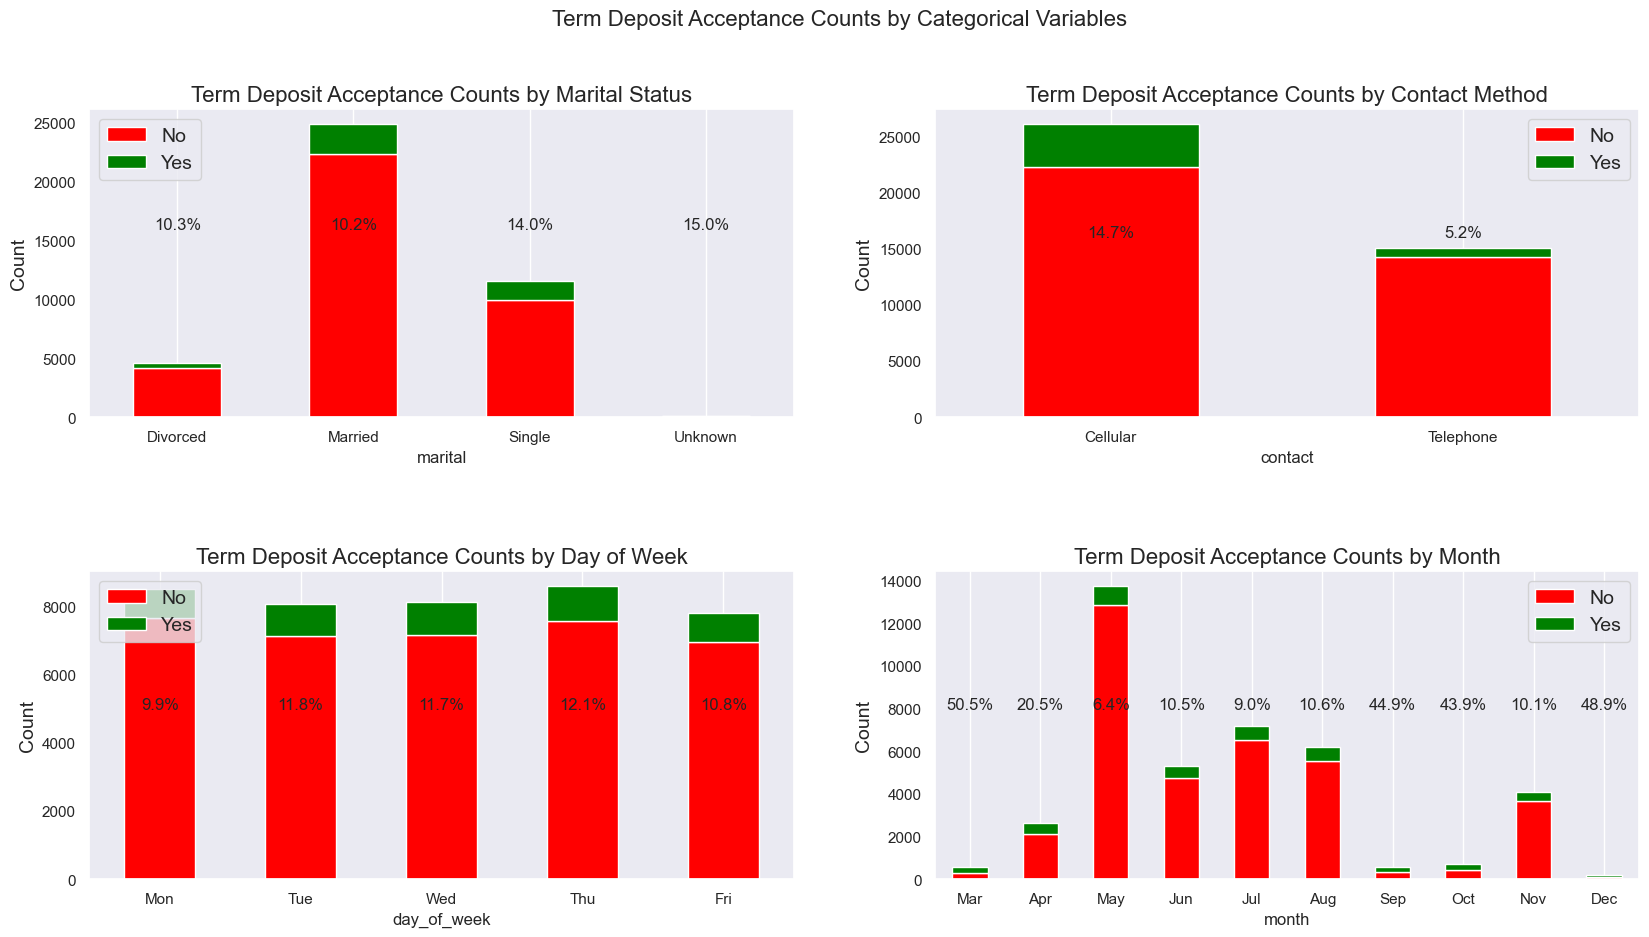

In [11]:
# Plot Categorical Variables
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Term Deposit Acceptance Counts by Categorical Variables', fontsize=16)

# Plot of Term Deposit Acceptance Counts by marital
df.groupby(['marital', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0, 0], color=['red', 'green'])
axes[0, 0].set_ylabel('Count',fontsize=14)
axes[0, 0].set_title('Term Deposit Acceptance Counts by Marital Status', fontsize=16)
axes[0, 0].set_xticklabels(['Divorced', 'Married', 'Single', 'Unknown'])
for tick in axes[0, 0].get_xticklabels():
    tick.set_rotation(0)
axes[0, 0].legend(['No','Yes'], loc='upper left', fontsize=14)
# show % yes over each bar sorted by marital status
for i in range(len(df['marital'].value_counts())):
    count = df.groupby(['marital', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["marital"]).size()[i]:.1f}%'
    axes[0, 0].text(i, 16000, pct_string, ha='center', fontsize=12)
axes[0, 0].grid(axis='y')

# Plot of Term Deposit Acceptance Counts by contact
df.groupby(['contact', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0, 1], color=['red', 'green'])
axes[0, 1].set_ylabel('Count',fontsize=14)
axes[0, 1].set_title('Term Deposit Acceptance Counts by Contact Method', fontsize=16)
axes[0, 1].set_xticklabels(['Cellular', 'Telephone'])
for tick in axes[0, 1].get_xticklabels():
    tick.set_rotation(0)
axes[0, 1].legend(['No','Yes'], loc='upper right', fontsize=14)
# show % yes over each bar sorted by contact method
for i in range(len(df['contact'].value_counts())):
    count = df.groupby(['contact', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["contact"]).size()[i]:.1f}%'
    axes[0, 1].text(i, 16000, pct_string, ha='center', fontsize=12)
axes[0, 1].grid(axis='y')
fig.subplots_adjust(hspace=0.5)

# Plot of Term Deposit Acceptance Counts by day_of_week
df_dow = df.groupby(['day_of_week', 'y']).size().unstack().reindex(['mon', 'tue', 'wed', 'thu', 'fri'])

df_dow.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['red', 'green'])
axes[1, 0].set_ylabel('Count',fontsize=14)
axes[1, 0].set_title('Term Deposit Acceptance Counts by Day of Week', fontsize=16)
axes[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
for tick in axes[1, 0].get_xticklabels():
    tick.set_rotation(0)
axes[1, 0].legend(['No','Yes'], loc='upper left', fontsize=14)
# show % yes over each bar sorted by day of week
for i in range(len(df_dow)):
    count = df_dow.iloc[i, 1]
    pct_string = f'{100*count/df_dow.sum(axis=1)[i]:.1f}%'
    axes[1, 0].text(i, 5000, pct_string, ha='center', fontsize=12)
axes[1, 0].grid(axis='y')

# Plot of Term Deposit Acceptance Counts by month
df_month = df.groupby(['month', 'y']).size().unstack().reindex(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

df_month.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['red', 'green'])
axes[1, 1].set_ylabel('Count',fontsize=14)
axes[1, 1].set_title('Term Deposit Acceptance Counts by Month', fontsize=16)
axes[1, 1].set_xticklabels(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for tick in axes[1, 1].get_xticklabels():
    tick.set_rotation(0)
axes[1, 1].legend(['No','Yes'], loc='upper right', fontsize=14)
# show % yes over each bar sorted by month
for i in range(len(df_month)):
    count = df_month.iloc[i, 1]
    pct_string = f'{100*count/df_month.sum(axis=1)[i]:.1f}%'
    axes[1, 1].text(i, 8000, pct_string, ha='center', fontsize=12)
axes[1, 1].grid(axis='y')
plt.savefig('images\Term_Deposit_Acceptance_Counts_by_Categorical_Variables2.png', bbox_inches='tight');

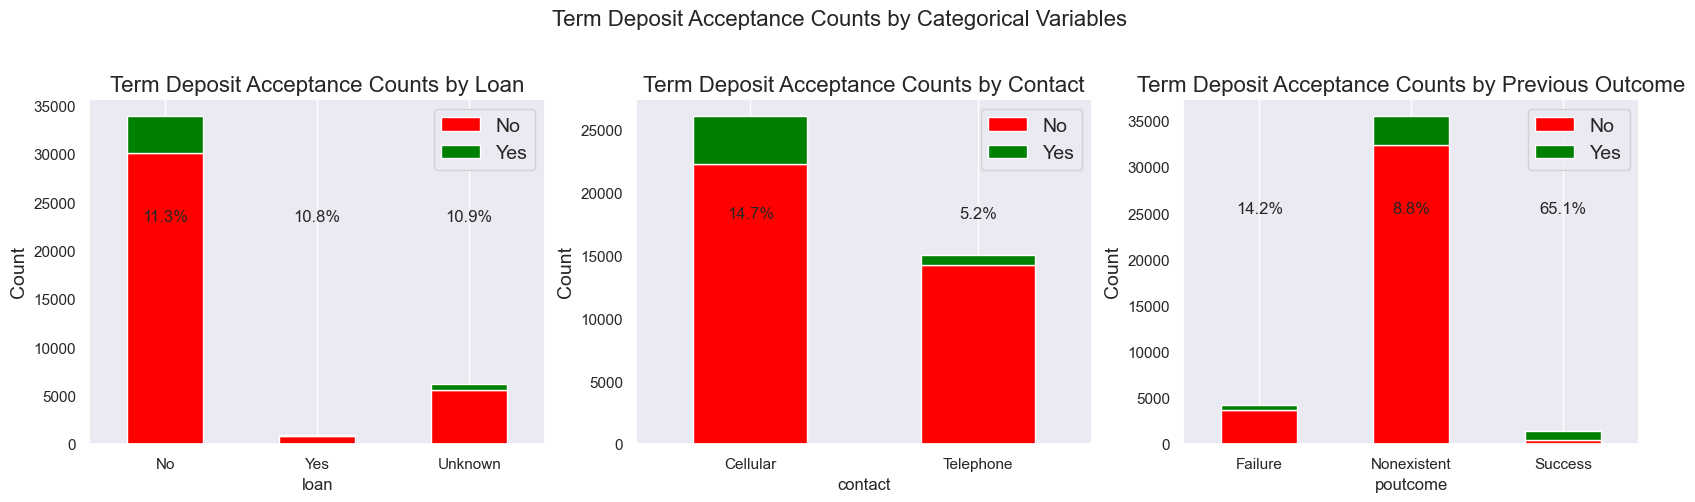

In [12]:
# plot loan, contact and poutcome side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Term Deposit Acceptance Counts by Categorical Variables', fontsize=16)

fig.subplots_adjust(top=0.8)
# Plot of Term Deposit Acceptance Counts by loan
df.groupby(['loan', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0], color=['red', 'green'])
axes[0].set_ylabel('Count',fontsize=14)
axes[0].set_title('Term Deposit Acceptance Counts by Loan', fontsize=16)
axes[0].set_xticklabels(['No', 'Yes', 'Unknown'])
for tick in axes[0].get_xticklabels():
    tick.set_rotation(0)
axes[0].legend(['No','Yes'], loc='upper right', fontsize=14)
# show % yes over each bar sorted by loan
for i in range(len(df['loan'].value_counts())):
    count = df.groupby(['loan', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["loan"]).size()[i]:.1f}%'
    axes[0].text(i, 23000, pct_string, ha='center', fontsize=12)
axes[0].grid(axis='y')

# Plot of Term Deposit Acceptance Counts by contact
df.groupby(['contact', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1], color=['red', 'green'])
axes[1].set_ylabel('Count',fontsize=14)
axes[1].set_title('Term Deposit Acceptance Counts by Contact', fontsize=16)
axes[1].set_xticklabels(['Cellular', 'Telephone'])
for tick in axes[1].get_xticklabels():
    tick.set_rotation(0)
axes[1].legend(['No','Yes'], loc='upper right', fontsize=14)
# show % yes over each bar sorted by contact
for i in range(len(df['contact'].value_counts())):
    count = df.groupby(['contact', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["contact"]).size()[i]:.1f}%'
    axes[1].text(i, 18000, pct_string, ha='center', fontsize=12)
axes[1].grid(axis='y')

# Plot of Term Deposit Acceptance Counts by poutcome
df.groupby(['poutcome', 'y']).size().unstack().plot(kind='bar', stacked=True, ax=axes[2], color=['red', 'green'])
axes[2].set_ylabel('Count',fontsize=14)
axes[2].set_title('Term Deposit Acceptance Counts by Previous Outcome', fontsize=16)
axes[2].set_xticklabels(['Failure', 'Nonexistent', 'Success'])
for tick in axes[2].get_xticklabels():
    tick.set_rotation(0)
axes[2].legend(['No','Yes'], loc='upper right', fontsize=14)
# show % yes over each bar sorted by previous outcome
for i in range(len(df['poutcome'].value_counts())):
    count = df.groupby(['poutcome', 'y']).size().unstack().iloc[i, 1]
    pct_string = f'{100*count/df.groupby(["poutcome"]).size()[i]:.1f}%'
    axes[2].text(i, 25000, pct_string, ha='center', fontsize=12)
axes[2].grid(axis='y')  
plt.savefig('images\Term_Deposit_Acceptance_Counts_by_Categorical_Variables3.png', bbox_inches='tight');

<div class="alert alert-block alert-info">

####  Data Understanding:  
1. Data is imbalanced with 88.7% of the data being 'no' and 11.3% being 'yes'. 
2. There are null values in the dataset listed as 'unknown'. 
3. The data is categorical and will need to be encoded for modeling.

In [5]:
# As I start on data cleaning, I use the following function to keep track of how much data we are removing:

def rows_removed(new_data, org_data):
    print('Original # of rows: {:,}'.format(org_data.shape[0]))
    print('')
    print('    Total rows removed: {:,}'.format(org_data.shape[0] - new_data.shape[0]))
    print('    Total rows remaining: {:,}'.format(new_data.shape[0]))
    print('')
    print('    % rows removed: {:.0f}%'.format(round(100*(org_data.shape[0] - new_data.shape[0])/org_data.shape[0],2)))
    print('    % rows remaining: {:.0f}%'.format(round(100*(new_data.shape[0])/org_data.shape[0],2)))

In [9]:
# Copy df to df_clean to start cleaning
df_clean = df.copy()

In [10]:
# Value counts for each non-numerical column including the target column name
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        print('-----', col, '-----')
        print(df_clean[col].value_counts())
        print()

----- job -----
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

----- marital -----
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

----- education -----
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

----- default -----
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

----- housing -----
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

----- loan -----
no         33950
yes         6248
unknown      990
Name: loa

In [8]:
# Replace 'unknown' values with NaN
df_clean.replace('unknown', np.nan, inplace=True)

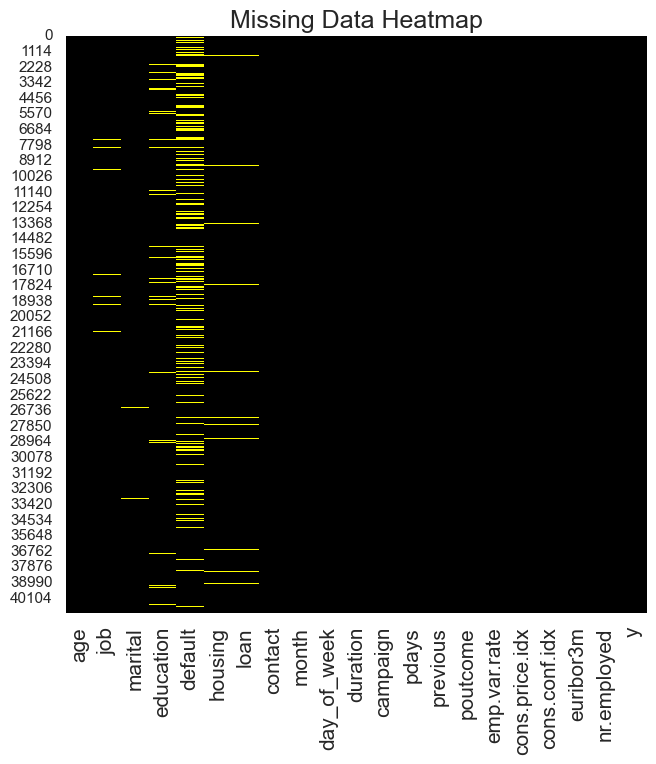

In [39]:
# Plot Missing Data
plt.figure(figsize = (7.5, 7.5))
plt.title('Missing Data Heatmap', fontsize = 18)
plt.xticks(fontsize = 15)
sns.heatmap(df_clean.isnull(), cbar = False, cmap = 'gnuplot')
plt.show()

In [40]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# Keep only the columns 1 - 7 and 21
df_clean7 = df_clean.iloc[:, np.r_[0:7, 20]]

In [10]:
df_clean7.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,NaN,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [11]:
# Remove duplicate rows
pd.options.mode.chained_assignment = None
df_clean7.drop_duplicates(inplace=True)
rows_removed(df_clean7, df_clean)

Original # of rows: 41,188

    Total rows removed: 26,097
    Total rows remaining: 15,091

    % rows removed: 63%
    % rows remaining: 37%


In [12]:
# Replace 'unknown' values with NaN
df_clean.replace('unknown', np.nan, inplace=True)

In [13]:
#imputation options
# 1. Drop rows with missing values
# 2. Impute missing values with mean, median, mode
# 3. Impute missing values with KNNImputer
# 4. Impute missing values with IterativeImputer

In [14]:
# Drop rows with missing values
df_clean7.dropna(inplace=True)
rows_removed(df_clean7,df)

Original # of rows: 41,188

    Total rows removed: 31,870
    Total rows remaining: 9,318

    % rows removed: 77%
    % rows remaining: 23%


In [15]:
# List of object columns
object_cols = list(df_clean7.select_dtypes(include=['object']).columns)
object_cols

['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

In [16]:
# One-hot encode the object columns
df_clean7 = pd.get_dummies(df_clean7, columns=object_cols, drop_first=True)

In [17]:
df_clean7.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,y_yes
0,56,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,37,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,40,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,56,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
6,59,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


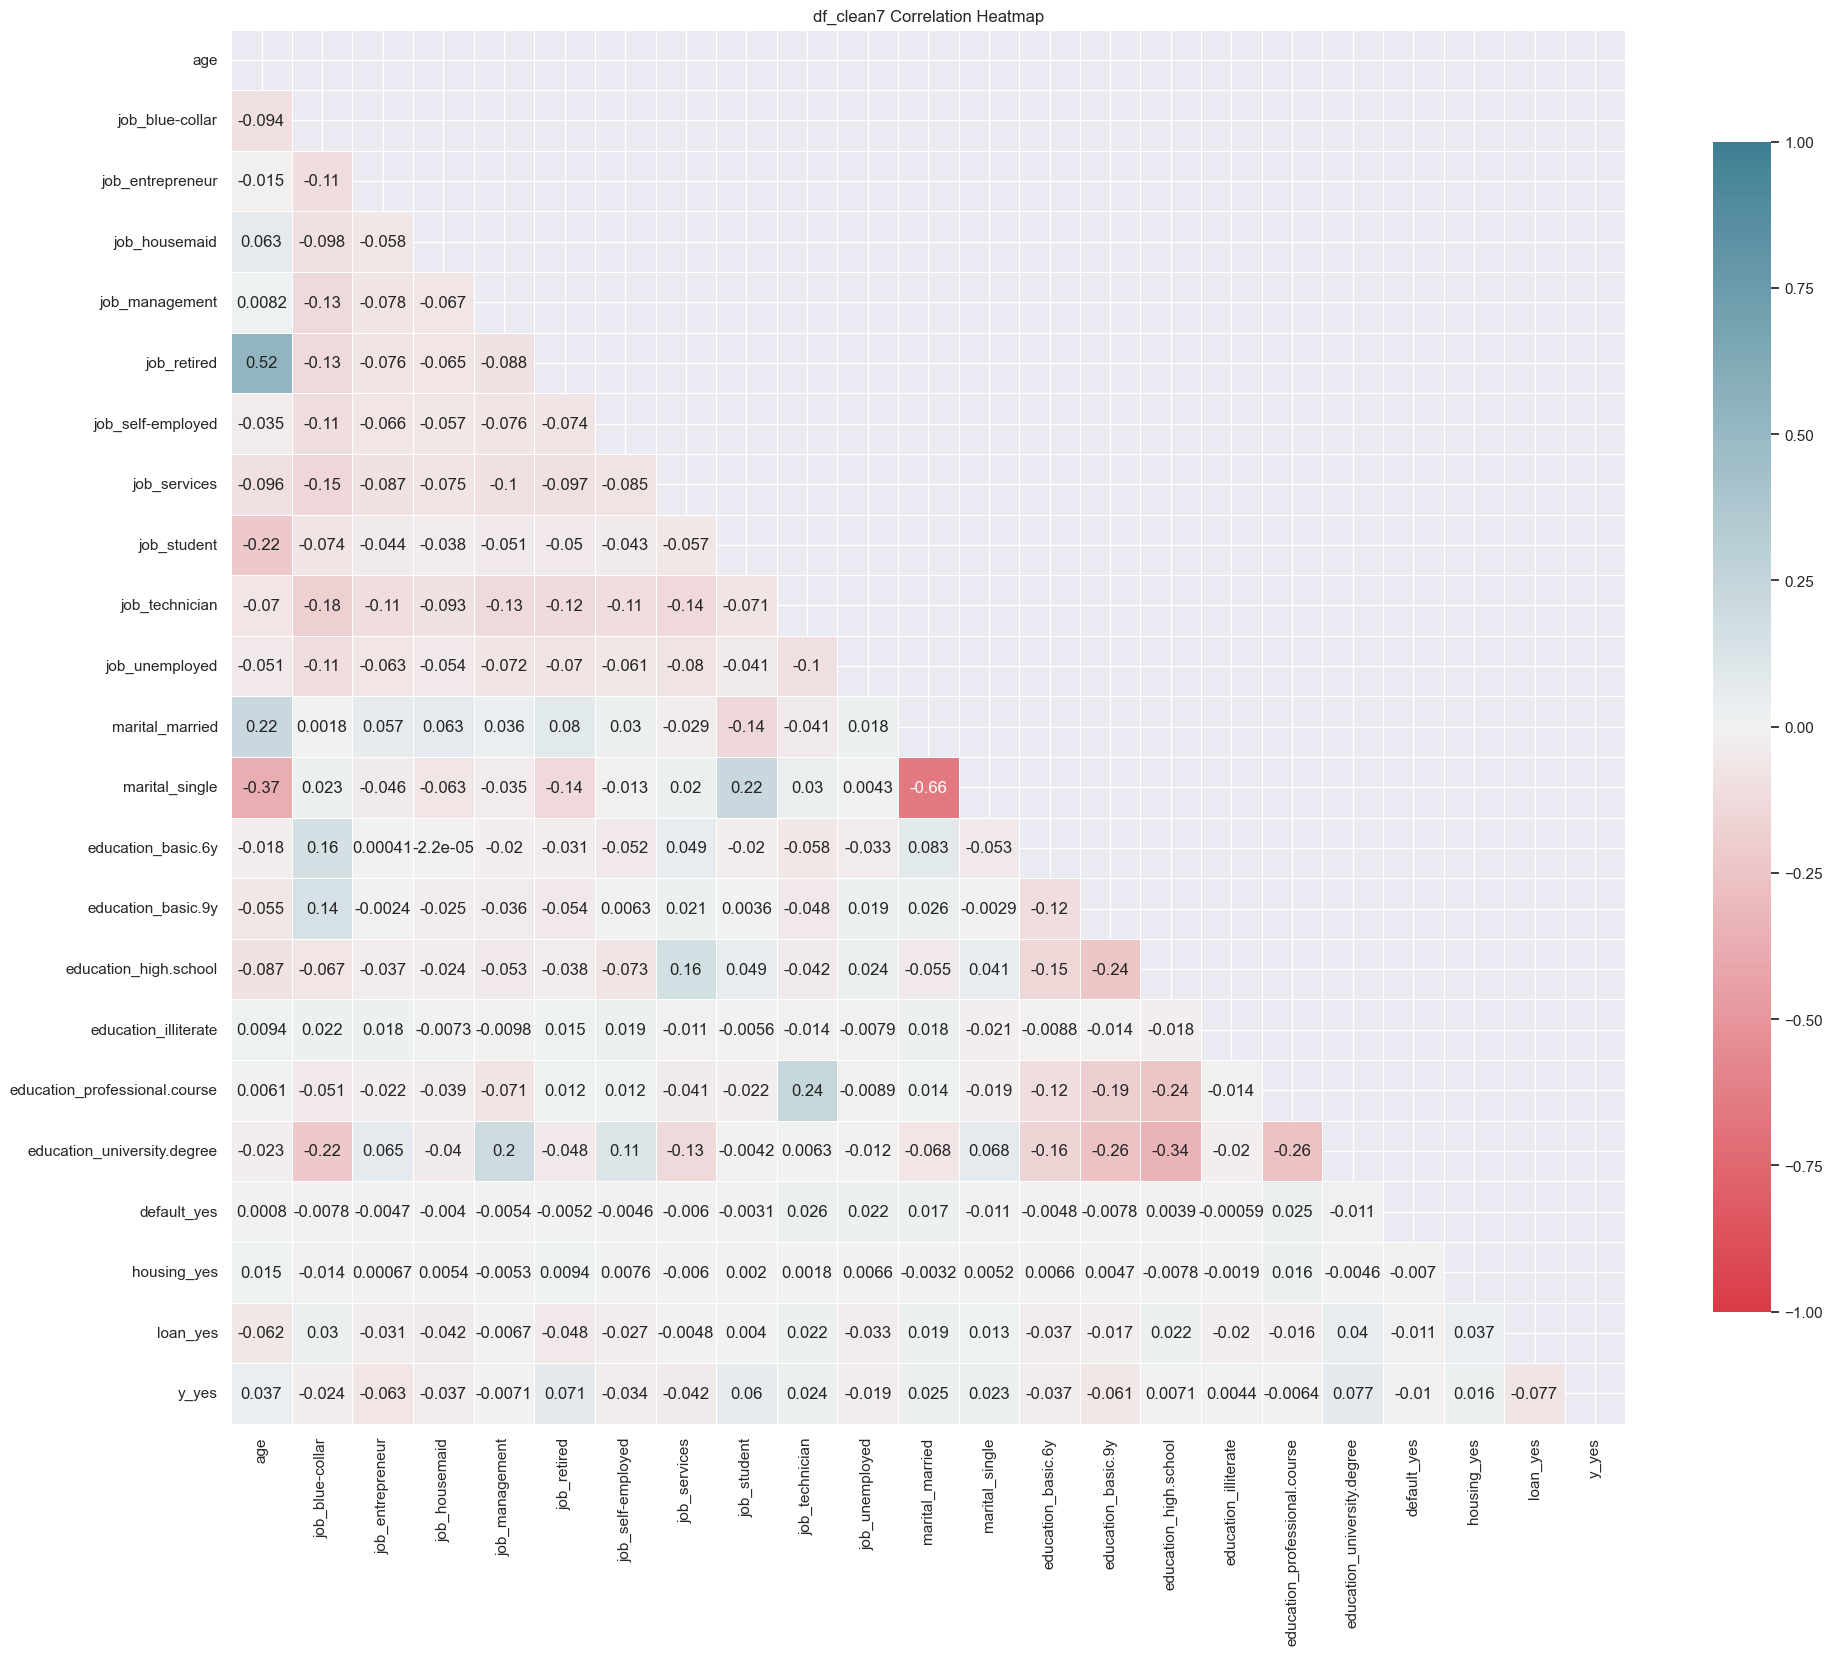

In [52]:
# Plot heatmap of correlations
plt.figure(figsize = (20,20), tight_layout = True)
plt.title('df_clean7 Correlation Heatmap', fontsize = 12)
corr = df_clean7.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, 
            cmap = cmap, 
            mask = mask, 
            center = 0, 
            vmax = 1, 
            vmin = -1, 
            square = True, 
            linewidths = 0.5, 
            cbar_kws={"shrink": 0.6},
            annot = True,
)
plt.show();

<div class="alert alert-block alert-info">

#### After data cleaning we only have 9,318 rows left which is only 23% of the original data set

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
# Split data into X and y
X = df_clean7.drop('y_yes', axis=1)
y = df_clean7['y_yes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("\n")

print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (7454, 22)
y_train:  (7454,)


X_test:  (1864, 22)
y_test:  (1864,)


In [20]:
X_train.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes
12836,27,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
15478,24,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
27850,21,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
17688,53,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
39279,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [21]:
#Scale data with to_be_scaled_cols of df_clean7
to_be_scaled_cols = ['age']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train[to_be_scaled_cols] = scaler.fit_transform(X_train[to_be_scaled_cols])

# Transform the test set
X_test[to_be_scaled_cols] = scaler.transform(X_test[to_be_scaled_cols])

In [22]:
X_train.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes
12836,-1.201395,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
15478,-1.445187,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
27850,-1.688978,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
17688,0.911466,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
39279,-0.957603,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [23]:
# perform dummy classifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

y_pred = dummy.predict(X_test)

df_accuracy = accuracy_score(y_test, y_pred)

print('Training Accuracy score: {:.3f}'.format(dummy.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(dummy.score(X_test, y_test)))

Training Accuracy score: 0.754
Test Accuracy score: 0.769


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Performance of the classifiers: K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. 

In [27]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

y_pred = logreg.predict(X_test)

df_accuracy = accuracy_score(y_test, y_pred)

print ('Logistic Regression classification: simple')
print ('---------------------------------------------------')
print('Training Accuracy score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(logreg.score(X_test, y_test)))


df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)

Logistic Regression classification: simple
---------------------------------------------------
Training Accuracy score: 0.754
Test Accuracy score: 0.768
Accuracy: 0.768
Precision: 0.638
Recall: 0.768
279 ms ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Problem 9: Score the Model

What is the accuracy of your model?

In [38]:
# Print the Results 
print ('Logistic Regression Results')

res_dict = {'model': ['Logistic Regression'],         
           'Train Time': ['279 ms'],
           'Train Accuracy': [0.754],
           'Test Accuracy': [ 0.768]}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

Logistic Regression Results


,Train Time,Train Accuracy,Test Accuracy
model,,,
Logistic Regression,279 ms,0.754,0.768


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [39]:
# Perform and compare Performance of the classifiers: K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.
# K Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

y_pred = knn.predict(X_test)

df_accuracy = accuracy_score(y_test, y_pred)

print ('KNN Regression classification: simple')
print ('---------------------------------------------------')
print('Training Accuracy score: {:.3f}'.format(knn.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(knn.score(X_test, y_test)))

df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)

print('\n')

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

y_pred = logreg.predict(X_test)

df_accuracy = accuracy_score(y_test, y_pred)

print ('Logistic Regression classification: simple')
print ('---------------------------------------------------')
print('Training Accuracy score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(logreg.score(X_test, y_test)))

df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)

print('\n')

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

y_pred = dtree.predict(X_test)

df_accuracy = accuracy_score(y_test, y_pred)

print ('Decision Tree classification: simple')
print ('---------------------------------------------------')
print('Training Accuracy score: {:.3f}'.format(dtree.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(dtree.score(X_test, y_test)))

df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)

print('\n')

# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

y_pred = svc.predict(X_test)

df_accuracy = accuracy_score(y_test, y_pred)

print ('SVM classification: simple')
print ('---------------------------------------------------')
print('Training Accuracy score: {:.3f}'.format(svc.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(svc.score(X_test, y_test)))

df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)

KNN Regression classification: simple
---------------------------------------------------
Training Accuracy score: 0.776
Test Accuracy score: 0.679
Accuracy: 0.679
Precision: 0.616
Recall: 0.679
The slowest run took 5.01 times longer than the fastest. This could mean that an intermediate result is being cached.
241 ms ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Logistic Regression classification: simple
---------------------------------------------------
Training Accuracy score: 0.754
Test Accuracy score: 0.768
Accuracy: 0.768
Precision: 0.638
Recall: 0.768
151 ms ± 47.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Decision Tree classification: simple
---------------------------------------------------
Training Accuracy score: 0.853
Test Accuracy score: 0.560
Accuracy: 0.560
Precision: 0.566
Recall: 0.560
124 ms ± 35.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


SVM classification: simple
---------------------------------------------------
Tra

In [43]:
# Print the Results 
print ('Logistic Regression Results')

res_dict = {'model': ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM'],         
           'Train Time': ['241 ms','151 ms','124 ms','129 ms'],
           'Train Accuracy': [0.756, 0.754, 0.853, 0.756],
           'Test Accuracy': [ 0.679, 0.768, 0.560, 0.767],
           'Precision': [0.679, 0.768, 0.566, 0.655],
              'Recall': [0.679, 0.768, 0.560, 0.767]}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

Logistic Regression Results


,Train Time,Train Accuracy,Test Accuracy,Precision,Recall
model,,,,,
KNN,241 ms,0.756,0.679,0.679,0.679
Logistic Regression,151 ms,0.754,0.768,0.768,0.768
Decision Tree,124 ms,0.853,0.560,0.566,0.560
SVM,129 ms,0.756,0.767,0.655,0.767


<div class="alert alert-block alert-info">

#### Logistic Regression is the best model for this data set (limited to 7 features)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

<div class="alert alert-block alert-info">

#### Model Impovements:
1. Use the full feature set 
2. Compare the performance of the classifiers: K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines
3. Tune the hyperparameters of the best performing classifier

#### Data cleaning and preprocessing

In [47]:
# drop duplicate rows for df_clean
df_clean.drop_duplicates(inplace=True)
rows_removed(df_clean,df)

Original # of rows: 41,188

    Total rows removed: 12
    Total rows remaining: 41,176

    % rows removed: 0%
    % rows remaining: 100%


In [56]:
# List of object columns
object_cols = list(df_clean.select_dtypes(include=['object']).columns)
object_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [57]:
# One-hot encode the object columns
df_clean = pd.get_dummies(df_clean, columns=object_cols, drop_first=True)

In [58]:
# Impute missing values with KNN
imputer = KNNImputer(n_neighbors=5)
df_clean = pd.DataFrame(imputer.fit_transform(df_clean), columns = df_clean.columns)

### Train/Test Split of the cleaned data

In [61]:
# Split data into X and y
X = df_clean.drop('y_yes', axis=1)
y = df_clean['y_yes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("\n")

print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (32940, 47)
y_train:  (32940,)


X_test:  (8236, 47)
y_test:  (8236,)


#### Scale data with to_be_scaled_cols

In [62]:
df_clean.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
df_clean['job_blue-collar'].value_counts()

0.0    31923
1.0     9253
Name: job_blue-collar, dtype: int64

In [67]:
# Identify columns to be scaled
to_be_scaled_cols = ['age', 'duration', 'campaign', 'pdays', 'previous','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Scale the data using StandardScaler and update the X_train and X_test dataframes
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[to_be_scaled_cols] = scaler.fit_transform(X_train[to_be_scaled_cols])
X_test_scaled[to_be_scaled_cols] = scaler.transform(X_test[to_be_scaled_cols])

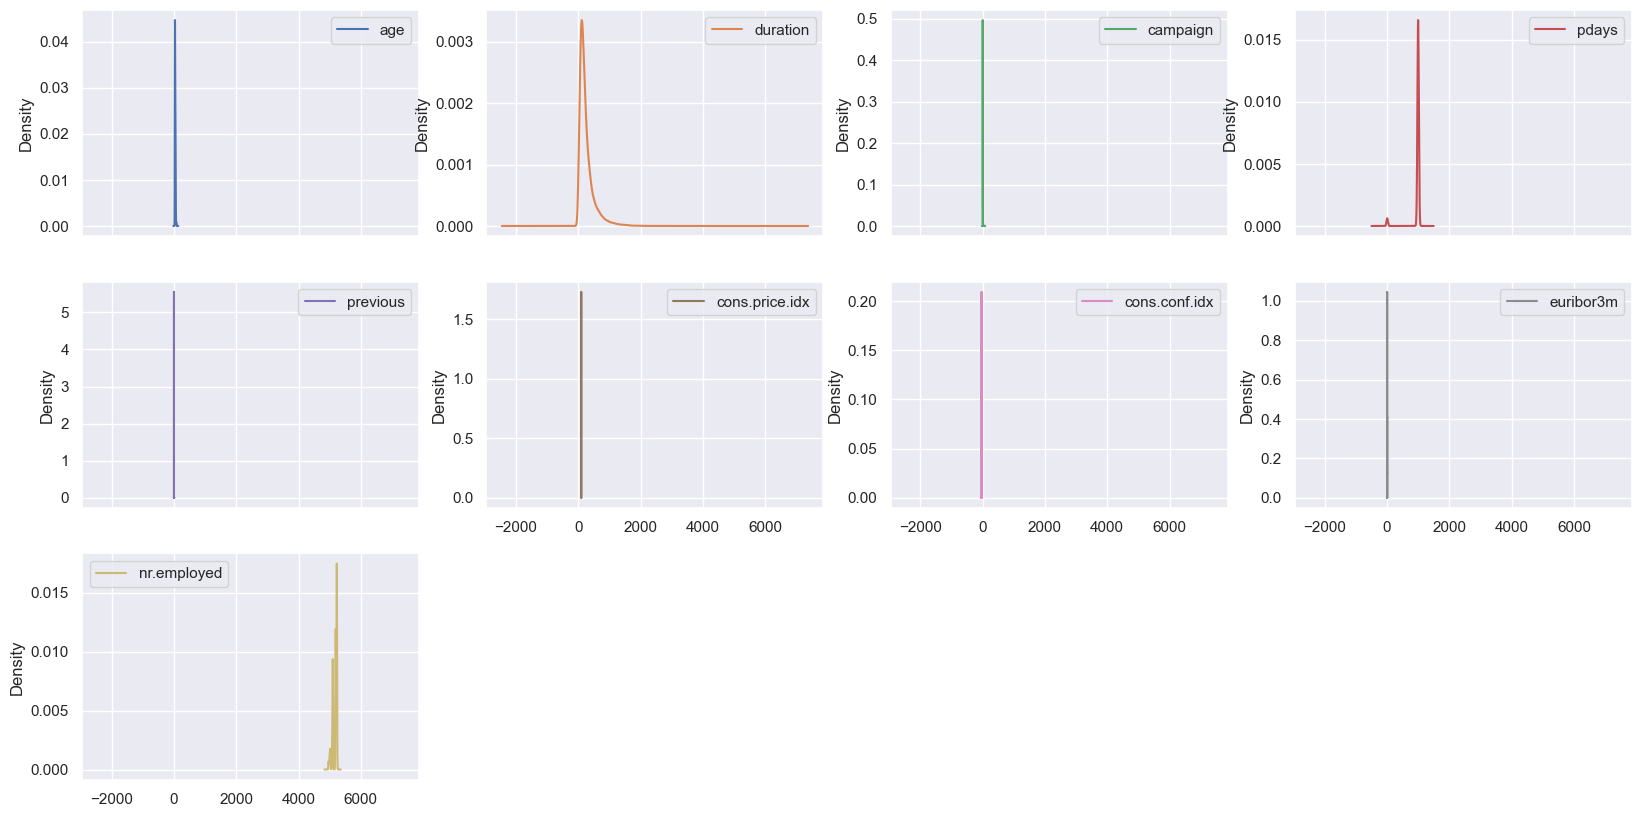

In [68]:
# Before scaling
X_train[to_be_scaled_cols].plot(kind = 'kde', subplots = True, figsize = (20, 10), layout = (3, 4));

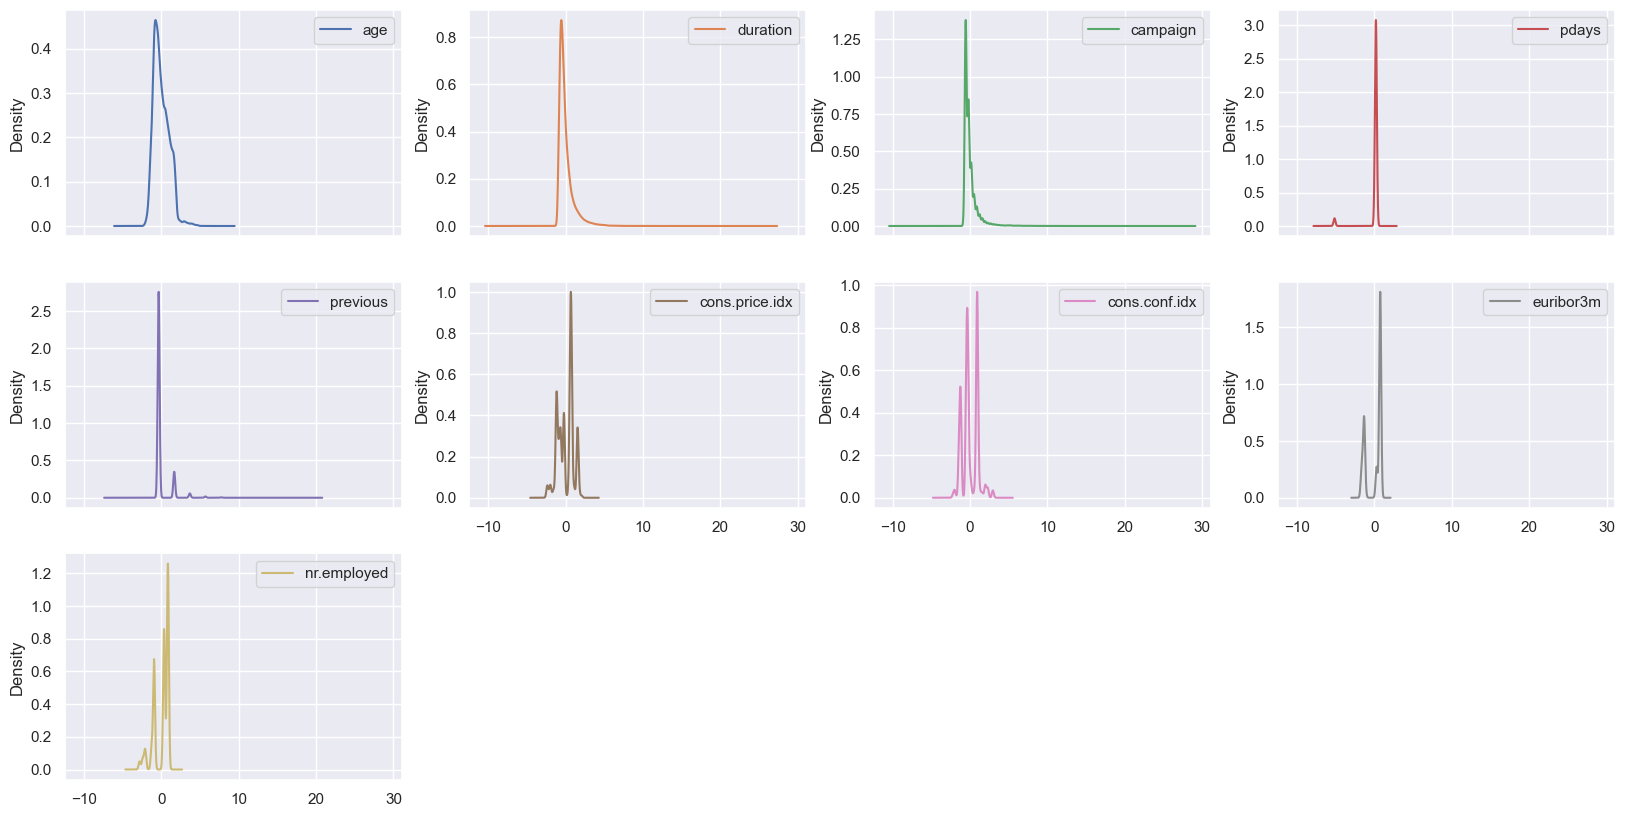

In [69]:
# After scaling
X_train_scaled[to_be_scaled_cols].plot(kind = 'kde', subplots = True, figsize = (20, 10), layout = (3, 4));

In [70]:
# Scaled data looks good we copy the scaled data back to X_train and X_test
X_train = X_train_scaled .copy()
X_test = X_test_scaled.copy()

#### Base Model

In [71]:
# perform dummy classifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

y_pred = dummy.predict(X_test)

df_accuracy = accuracy_score(y_test, y_pred)

print('Training Accuracy score: {:.3f}'.format(dummy.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(dummy.score(X_test, y_test)))

Training Accuracy score: 0.889
Test Accuracy score: 0.881


In [74]:
# Logistic Regression classification with Grid Search
print ('Logistic Regression classification with Grid Search')
print ('---------------------------------------------------')


warnings.filterwarnings('ignore')

# create a parameter grid with penalty, max_iter, and C
param_grid = {'penalty': ['l1', 'l2'],
                'max_iter': [100, 1000, 2500, 5000],
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# instantiate the model
logreg = LogisticRegression()
# instantiate the grid search model
logreg_cv = GridSearchCV(estimator = logreg, param_grid = param_grid,
                            cv = 5, n_jobs = -1, verbose = 2)

# fit the grid search to the data
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
print('Training Accuracy score: {:.3f}'.format(logreg_cv.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(logreg_cv.score(X_test, y_test)))
print('Average fit time: {:.3f}'.format(logreg_cv.cv_results_['mean_fit_time'].mean()))

# print confusion matrix
y_pred = logreg_cv.predict(X_test)
# print(confusion_matrix(y_test, y_pred))

df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)
print(classification_report(y_test, y_pred))

Logistic Regression classification with Grid Search
---------------------------------------------------
Fitting 5 folds for each of 56 candidates, totalling 280 fits


Tuned Logistic Regression Parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
Best score is 0.91117182756527
Training Accuracy score: 0.912
Test Accuracy score: 0.910
Average fit time: 1.239
Accuracy: 0.910
Precision: 0.899
Recall: 0.910
1 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7258
         1.0       0.70      0.42      0.52       978

    accuracy                           0.91      8236
   macro avg       0.81      0.70      0.74      8236
weighted avg       0.90      0.91      0.90      8236



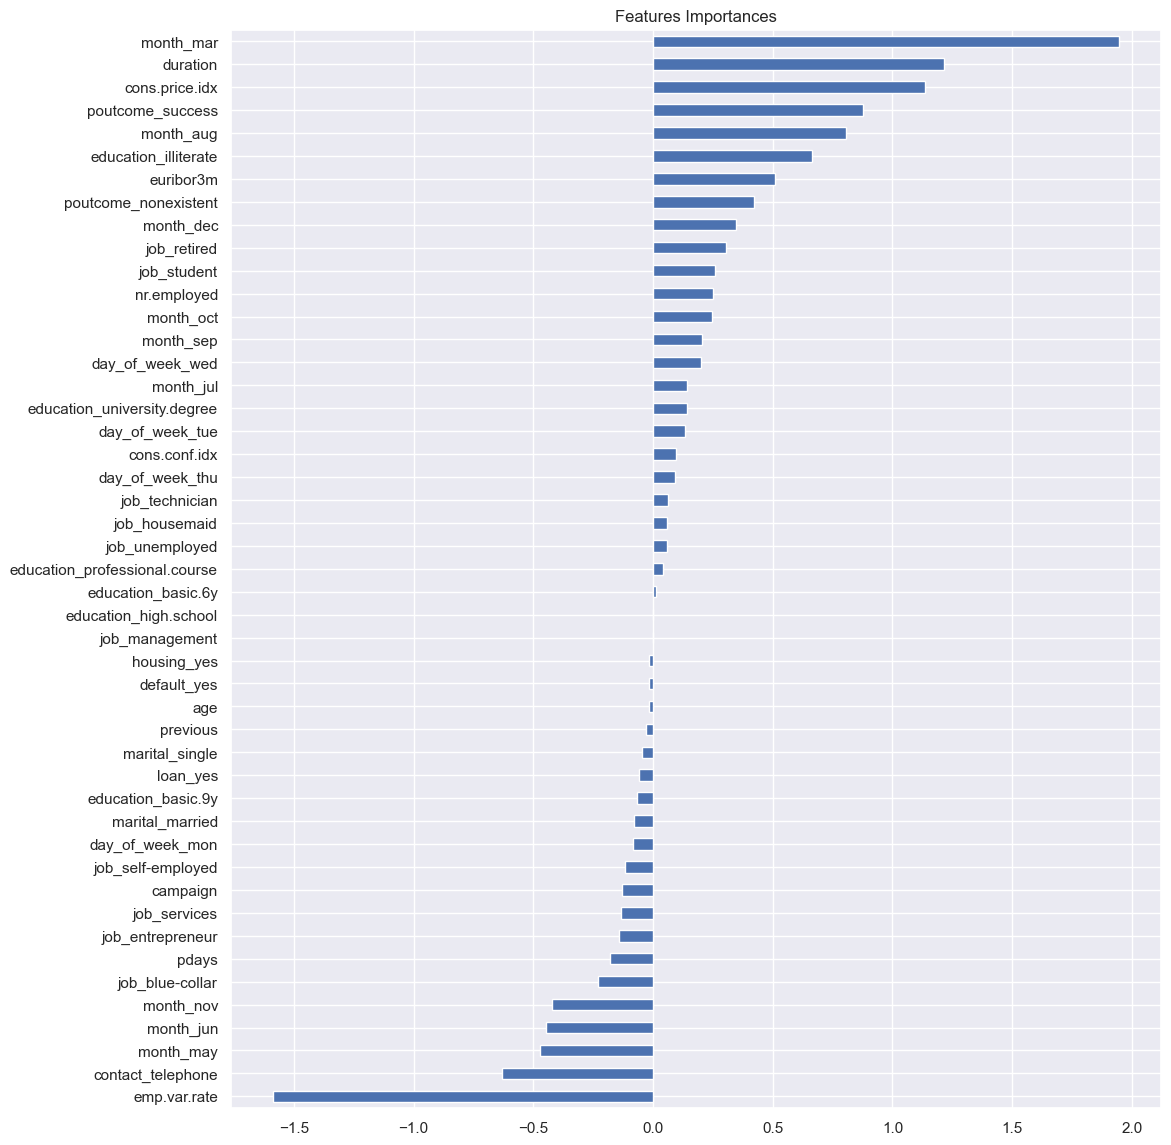

In [80]:
# plot top 10 feature importances as horizontal bar chart in descending order
importances = pd.Series(data=logreg_cv.best_estimator_.coef_[0], index=X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', figsize= (12,14))
plt.title('Features Importances')
plt.show();

In [81]:
# Decision tree classification with Grid Search
print ('Descion Tree classification with Grid Search')
print ('---------------------------------------------------')

# create a parameter grid with all hyperparameters
param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# instantiate the model
dtree = DecisionTreeClassifier()
# instantiate the grid search model
dtree_cv = GridSearchCV(estimator = dtree, param_grid = param_grid,
                            cv = 5, n_jobs = -1, verbose = 2)

# fit the grid search to the data
dtree_cv.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(dtree_cv.best_params_))
print("Best score is {}".format(dtree_cv.best_score_))
print('Training Accuracy score: {:.3f}'.format(dtree_cv.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(dtree_cv.score(X_test, y_test)))
print('Average fit time: {:.3f}'.format(dtree_cv.cv_results_['mean_fit_time'].mean()))

# print confusion matrix
y_pred = dtree_cv.predict(X_test)
# print(confusion_matrix(y_test, y_pred))

df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)
print(classification_report(y_test, y_pred))

Descion Tree classification with Grid Search
---------------------------------------------------
Fitting 5 folds for each of 162 candidates, totalling 810 fits


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best score is 0.9130540376442017
Training Accuracy score: 0.916
Test Accuracy score: 0.915
Average fit time: 0.713
Accuracy: 0.915
Precision: 0.910
Recall: 0.915
1.04 s ± 254 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      7258
         1.0       0.67      0.56      0.61       978

    accuracy                           0.92      8236
   macro avg       0.81      0.76      0.78      8236
weighted avg       0.91      0.92      0.91      8236



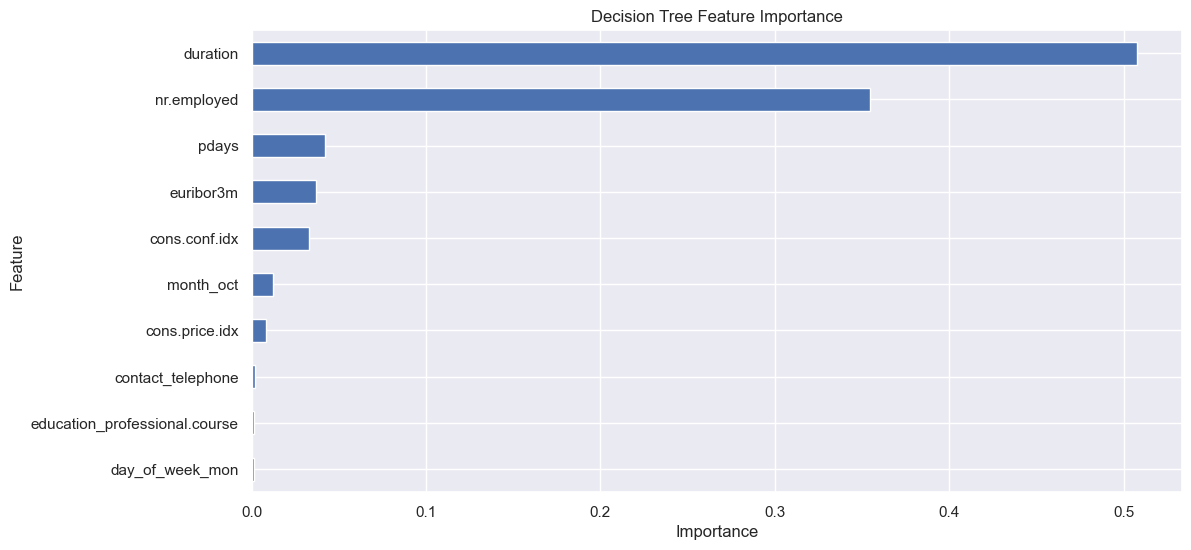

In [82]:
# plot top 10 feature importances
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': dtree_cv.best_estimator_.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance = feature_importance.iloc[:10, :]
feature_importance.sort_values(by='importance', ascending=True, inplace=True)
feature_importance.plot(kind='barh', x='feature', y='importance', figsize=(12, 6), legend=False)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show();

In [84]:
# KNN classification with Grid Search
print ('KNN classification with Grid Search')
print ('---------------------------------------------------')

# create a parameter grid with all hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan', 'minkowski']}

# instantiate the model
knn = KNeighborsClassifier()
# instantiate the grid search model
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid,
                            cv = 5, n_jobs = -1, verbose = 2)

# fit the grid search to the data
knn_cv.fit(X_train, y_train)

print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))
print('Training Accuracy score: {:.3f}'.format(knn_cv.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(knn_cv.score(X_test, y_test)))
print('Average fit time: {:.3f}'.format(knn_cv.cv_results_['mean_fit_time'].mean()))

# print confusion matrix
y_pred = knn_cv.predict(X_test)
print(confusion_matrix(y_test, y_pred))

df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)
print(classification_report(y_test, y_pred))

KNN classification with Grid Search
---------------------------------------------------
Fitting 5 folds for each of 54 candidates, totalling 270 fits


Tuned KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Best score is 0.9077717061323618
Training Accuracy score: 1.000
Test Accuracy score: 0.904
Average fit time: 0.133
[[7064  194]
 [ 600  378]]
Accuracy: 0.904
Precision: 0.891
Recall: 0.904
1.78 s ± 537 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      7258
         1.0       0.66      0.39      0.49       978

    accuracy                           0.90      8236
   macro avg       0.79      0.68      0.72      8236
weighted avg       0.89      0.90      0.89      8236



In [83]:
# SVN classification with Grid Search
print ('SVN classification with Grid Search')
print ('---------------------------------------------------')

# create a parameter grid with all hyperparameters
param_grid = {
    # 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                # 'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# instantiate the model
svm = SVC()
# instantiate the grid search model
svm_cv = GridSearchCV(estimator = svm, param_grid = param_grid,
                            cv = 5, n_jobs = -1, verbose = 2)   

# fit the grid search to the data
svm_cv.fit(X_train, y_train)

print("Tuned SVM Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))
print('Training Accuracy score: {:.3f}'.format(svm_cv.score(X_train, y_train)))
print('Test Accuracy score: {:.3f}'.format(svm_cv.score(X_test, y_test)))
print('Average fit time: {:.3f}'.format(svm_cv.cv_results_['mean_fit_time'].mean()))

y_pred = svm_cv.predict(X_test)

# print confusion matrix
# print(confusion_matrix(y_test, y_pred))

df_accuracy = accuracy_score(y_test, y_pred)
df_precision = precision_score(y_test, y_pred, average='weighted')
df_recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(df_accuracy))
print('Precision: {:.3f}'.format(df_precision))
print('Recall: {:.3f}'.format(df_recall))
%timeit logreg.fit(X_train, y_train)
print(classification_report(y_test, y_pred))

SVN classification with Grid Search
---------------------------------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Tuned SVM Parameters: {'kernel': 'rbf'}
Best score is 0.910321797207043
Training Accuracy score: 0.921
Test Accuracy score: 0.908
Average fit time: 101.117
Accuracy: 0.908
Precision: 0.897
Recall: 0.908
715 ms ± 161 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7258
         1.0       0.70      0.40      0.51       978

    accuracy                           0.91      8236
   macro avg       0.81      0.69      0.73      8236
weighted avg       0.90      0.91      0.90      8236



In [90]:
# Print the Results 
print ('Model Comparison Results')

res_dict = {'model': ['Base', 'Logistic Reg.', 'Decision Tree', 'KNN', 'SVC'],         
           'train score': [0.889, 0.912, 0.916, 1.000, 0.921],
           'test score': [0.881, 0.910, 0.915, 0.904, 0.908],
           'Best score': ['',0.911, 0.913, 0.908, 0.910],      
           'Accuracy': ['', 0.91, 0.92, 0.90, 0.91],
           'Precision': ['', 0.90, 0.91, 0.89, 0.90],           
           'Recall': ['', 0.91, 0.92, 0.90, 0.91],
           'F1-score': ['', 0.90, 0.91, 0.89, 0.90],
           'Avg fit time (sec)': ['', 1.239, 0.713, 0.133, 101],
           'fits:': ['', 280, 810, 270, 20],
           'Best Params:': ['', 'C=1, max_iter=1000, penalty=l2', 'criterion=gini, max_depth=5, min_samples_split=2', 'metric=euclidean, n_neighbors=17, weights=distance', 'kernel=rbf']}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

Model Comparison Results


,train score,test score,Best score,Accuracy,Precision,Recall,F1-score,Avg fit time (sec),fits:,Best Params:
model,,,,,,,,,,
Base,0.889,0.881,,,,,,,,
Logistic Reg.,0.912,0.910,0.911,0.91,0.9,0.91,0.9,1.239,280,"C=1, max_iter=1000, penalty=l2"
Decision Tree,0.916,0.915,0.913,0.92,0.91,0.92,0.91,0.713,810,"criterion=gini, max_depth=5, min_samples_split=2"
KNN,1.000,0.904,0.908,0.9,0.89,0.9,0.89,0.133,270,"metric=euclidean, n_neighbors=17, weights=dist..."
SVC,0.921,0.908,0.91,0.91,0.9,0.91,0.9,101,20,kernel=rbf
